In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load

In [6]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\DataAnalyst.csv")

In [7]:
data.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


# EDA

In [8]:
data.shape

(2253, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2253.0,1126.000000,650.529400,0.0,563.0,1126.0,1689.0,2252.0
Rating,2253.0,3.160630,1.665228,-1.0,3.1,3.6,4.0,5.0
Founded,2253.0,1398.522858,901.929251,-1.0,-1.0,1979.0,2002.0,2019.0


* fix messy column names

In [11]:
data.columns = data.columns.str.replace(' ','_').str.replace(':','')

In [12]:
data.columns

Index(['Unnamed_0', 'Job_Title', 'Salary_Estimate', 'Job_Description',
       'Rating', 'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy_Apply'],
      dtype='object')

* Filter out irrelevant columns

In [13]:
relevant_cols = ['Job_Title', 'Salary_Estimate', 'Job_Description',
       'Rating', 'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']

In [14]:
df = data.loc[:,relevant_cols]

## Salary

* Check how many -1 in Salary column

In [15]:
filt_sal_error = (df['Salary_Estimate'].str.contains('-1'))

In [16]:
df.loc[filt_sal_error]

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors
2149,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1


* Remove the row(s) without a Salary Estimate

In [17]:
df = df.loc[~filt_sal_error]

* Create column: **Salary Rang**e containing only numbers
* Remove "(Glassdoor est.)"
* Replace "K" with "000"

In [18]:
df['Salary_Range'] = df.loc[:,'Salary_Estimate'].str.split().str[0].str.replace('K', '000').str.replace('$','')

* Create a column: **Minimum_Salary** and **Maximum_Salary**
* Then create column: **AVG_Salary**

In [19]:
df[['Minimum_Salary', 'Maximum_Salary']] = df.loc[:,'Salary_Range'].str.split('-', expand=True)

In [20]:
df.loc[:,'Minimum_Salary'] = df.loc[:,'Minimum_Salary'].astype('float64')

In [21]:
df.loc[:,'Maximum_Salary'] = df.loc[:,'Maximum_Salary'].astype('float64')

In [22]:
df['AVG_Salary'] = round((df.loc[:,'Minimum_Salary']+df.loc[:,'Maximum_Salary'])/2, 2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\369069712.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Minimum_Salary'], kde=True, bins=10, color='y')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\369069712.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Maximum_Salary']

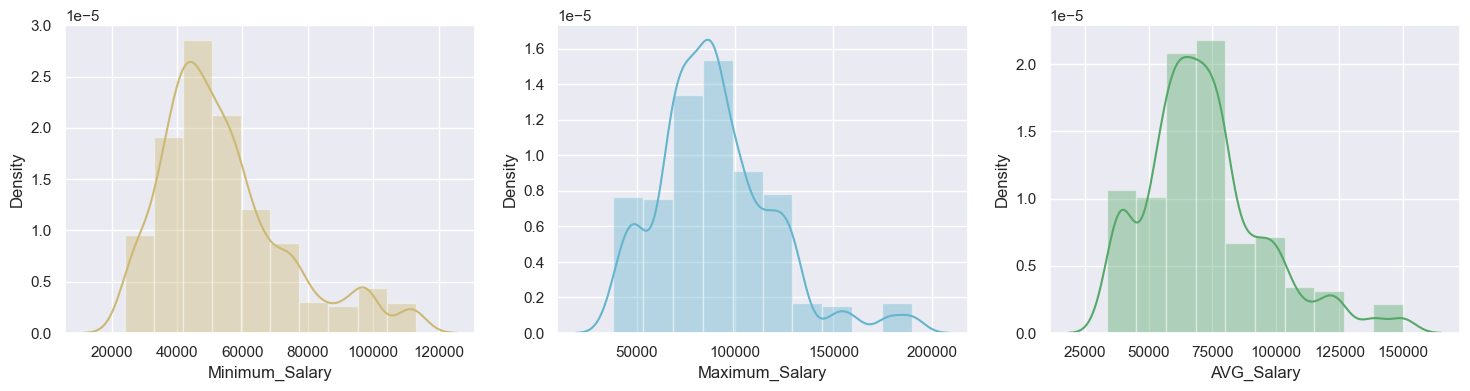

In [23]:
f = plt.figure(figsize=(18,4))
f.add_subplot(1,3,1)
sns.distplot(df['Minimum_Salary'], kde=True, bins=10, color='y')
f.add_subplot(1,3,2)
sns.distplot(df['Maximum_Salary'], kde=True, bins=10, color='c')
f.add_subplot(1,3,3)
sns.distplot(df['AVG_Salary'], kde=True, bins=10, color='g')
plt.show()

## Job Title

### Top 10 Data Analyst Jobs

In [24]:
df['Job_Title'].value_counts().head(20).to_frame()

,count
Job_Title,
Data Analyst,405
Senior Data Analyst,90
Junior Data Analyst,30
Business Data Analyst,28
Sr. Data Analyst,21
Data Quality Analyst,17
Data Analyst II,17
Data Analyst Junior,17
Data Governance Analyst,16


* A lot of different Job Titles
* Will categorize them and use that column later instead of job title

### Create Analyst Type based on Job Title

In [25]:
# Analyst Type
analyst_types = ['Quality', 'Business', 'Governance', 'Healthcare', 'Financial', 'Research', 'Marketing', 'Reporting', 'SQL', 'Manager']

def get_job_type(job_title):
    for type in analyst_types:
        if type.lower() in job_title.lower():
            if type.lower() == 'manager':
                return 'Manager'
            else:
                return type + ' Data Analyst'
    else:
        return 'General Data Analyst'

* Some job titles included "manager" so they will have there own category

In [26]:
df['Analyst_Type'] = df['Job_Title'].apply(lambda x: get_job_type(x))

In [27]:
df['Analyst_Type'].value_counts()

Analyst_Type
General Data Analyst       1722
Business Data Analyst       180
Quality Data Analyst         55
Healthcare Data Analyst      55
Reporting Data Analyst       51
Financial Data Analyst       42
Governance Data Analyst      36
Marketing Data Analyst       32
Research Data Analyst        30
SQL Data Analyst             29
Manager                      20
Name: count, dtype: int64

* Check Analyst Types Salaries

In [28]:
pd.pivot_table(df, index='Analyst_Type', values='AVG_Salary', aggfunc=np.mean).sort_values(by='AVG_Salary', ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\3382936585.py:1: FutureWarning: The provided callable <function mean at 0x000001BFDF0AFA60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, index='Analyst_Type', values='AVG_Salary', aggfunc=np.mean).sort_values(by='AVG_Salary', ascending=False)


,AVG_Salary
Analyst_Type,
Research Data Analyst,82250.0
Marketing Data Analyst,80625.0
Financial Data Analyst,76785.714286
Manager,74300.0
General Data Analyst,72285.423926
Business Data Analyst,70280.555556
Reporting Data Analyst,70147.058824
Healthcare Data Analyst,69418.181818
Quality Data Analyst,68490.909091


## Job Experience/Ranking

* Add a new feature: **Job experience**

In [29]:
job_exp_lst = ['manager', 'senior', 'sr.', 'sr', 'lead', 'junior', 'jr', 'jr.']
low_exp_lst = ['junior', 'jr', 'jr.']

In [30]:
def get_job_exp(job_title):
    for exp in job_exp_lst:
        if exp in job_title.lower() and exp not in low_exp_lst:
            return 'senior'
        elif exp in job_title.lower() and exp in low_exp_lst:
            return 'junior'
    else:
        return 'intermediate'

* If **senior** nor **junior** mentioned in job title, **intermediate** will be used

In [31]:
df['Job_EXP'] = df['Job_Title'].apply(get_job_exp)

In [32]:
df['Job_EXP'].value_counts(dropna=False)

Job_EXP
intermediate    1680
senior           499
junior            73
Name: count, dtype: int64

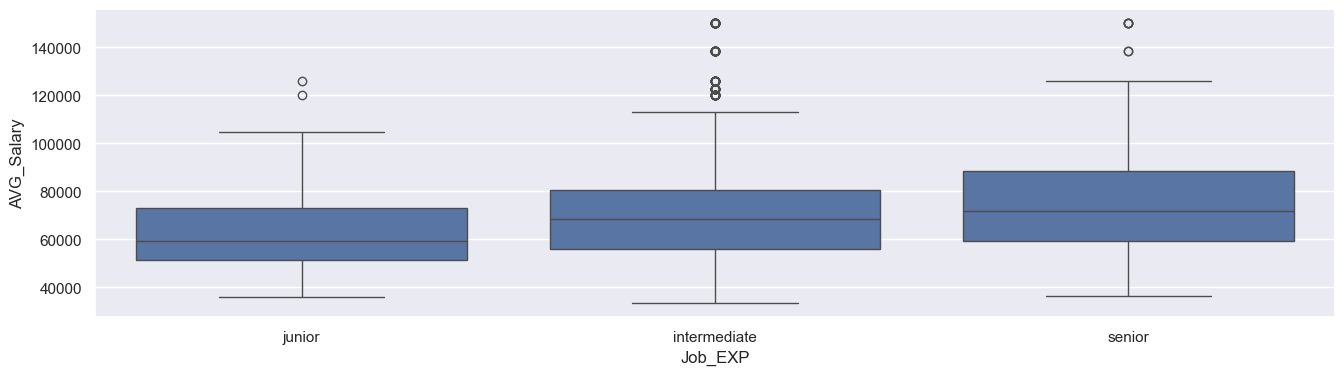

In [33]:
plt.figure(figsize=(16,4))
sns.boxplot(x='Job_EXP', y='AVG_Salary', data=df, order=['junior', 'intermediate', 'senior'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\3743114265.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_high_rank['AVG_Salary'], kde=True, hist=False,color='orange', label='Senior')
C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\3743114265.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

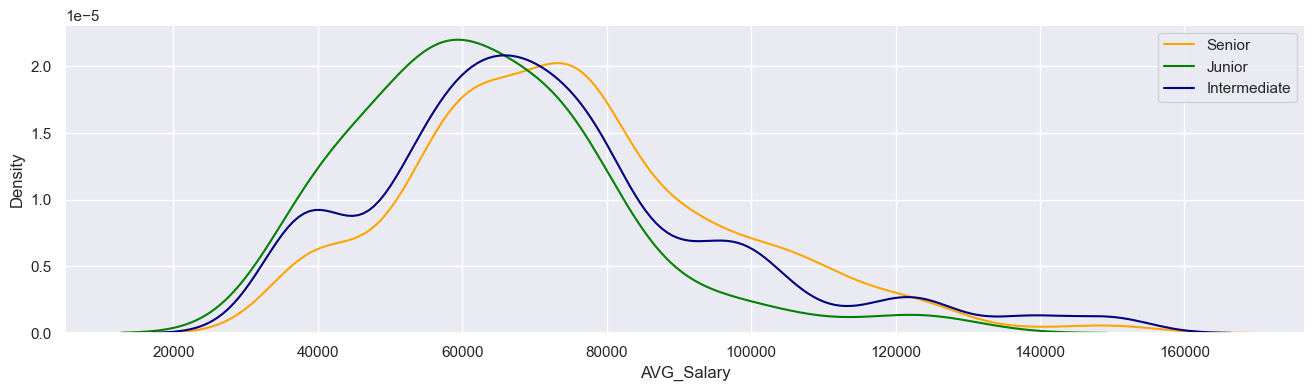

In [34]:
df_high_rank = df[df['Job_EXP']=='senior']
df_low_rank = df[df['Job_EXP']=='junior']
df_no_rank = df[df['Job_EXP'] == 'intermediate']
plt.figure(figsize=(16,4))
sns.distplot(df_high_rank['AVG_Salary'], kde=True, hist=False,color='orange', label='Senior')
sns.distplot(df_low_rank['AVG_Salary'], kde=True, hist=False,color='green', label='Junior')
sns.distplot(df_no_rank['AVG_Salary'], kde=True, hist=False,color='navy', label='Intermediate')
plt.legend()
plt.show()

* It seems to have a slight influence on salary whether a position is listed as junior or senior

## Skills from Job Description

* Extract skills from column **Job_Description** and create separate column

In [35]:
skills = ['SAS', 'Hadoop', 'Python', 'R program','AWS', 'Azure','SQL', 'Excel','Machine Learning', 'Tableau', 'Power BI', 'Qlik']

* The solution to detect if a job requires programming language R is not perfect
* If we only check for R there would be a result found in every row

In [36]:
def skills_to_cols(dataframe, skills_list):
    for skill in skills_list:
        dataframe[skill+'_extracted'] = dataframe['Job_Description'].apply(lambda x: 1 if skill.lower() in x.lower() else 0)

In [37]:
skills_to_cols(df, skills)

### Check how often skills appear in Job Description:

In [38]:
cols_to_melt = [item+'_extracted' for item in skills]

* Create a new DataFrame, store extracted skills in column and results in second column

In [39]:
df_melted = pd.melt(df, value_vars=cols_to_melt, var_name='Skill',value_name='TrueFalse')

* Only include rows where result is equal to 1 so we only keep where skill exist

In [40]:
filt = (df_melted['TrueFalse'] == 1)
df_melted = df_melted.loc[filt]

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\3011622889.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right')


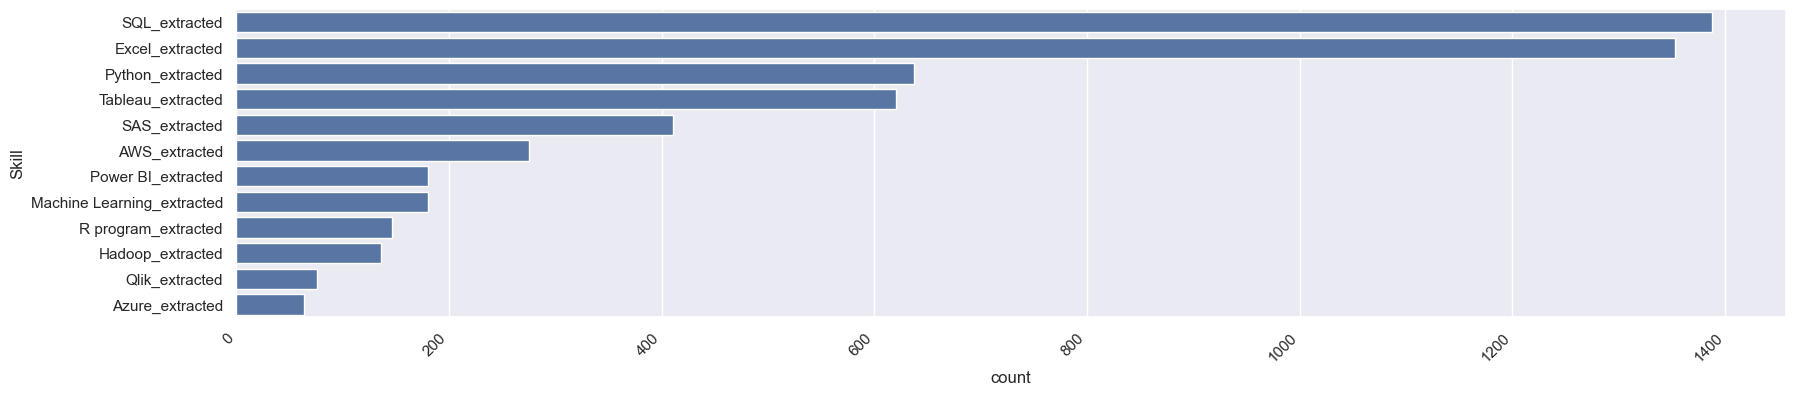

In [41]:
f = plt.figure(figsize=(20,4))
f = sns.countplot(df_melted['Skill'], order = df_melted['Skill'].value_counts().index)
f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

* SQL and Excel are by far the most mentioned skills
* Python follows on place 3 and is appearing more often than R programming
* Tableau as a BI Reporting tool also seems to be important and more popular than Power BI or Qlik
* Keep in mind: the results for programming language R need to be treated with caution
* AWS seem to be more popular than Azure

## Competitors

In [42]:
df['Competitors'].value_counts().head()

Competitors
-1                                                      1731
Adecco, Manpower                                          14
Robert Half, Insight Global                               14
Google, Microsoft, Samsung Electronics                    10
Artech Information Systems, Mindlance, Tech Mahindra      10
Name: count, dtype: int64

In [43]:
df['Competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

## Rating

* Identify where rating is -1

In [44]:
filt_rating_err = (df['Rating'] == -1)

In [45]:
print(f'Rating entries containing -1: {len(df.loc[filt_rating_err])}')

Rating entries containing -1: 272


* Replace -1 with Nan so we can impute later

In [46]:
df.loc[filt_rating_err, 'Rating'] = np.nan

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\1120018605.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'], kde=True, bins=10)


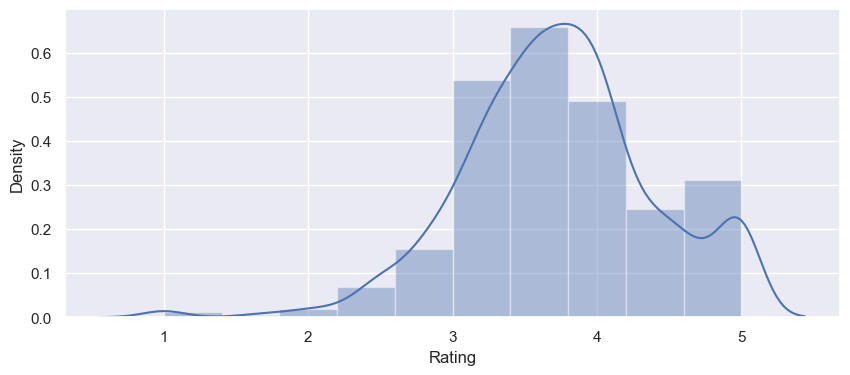

In [47]:
plt.figure(figsize=(10,4))
sns.distplot(df['Rating'], kde=True, bins=10)
plt.show()

## Fix Company Names

In [48]:
df['Company_Name'].sample(10)

1123         University of Pennsylvania\n4.3
2069          The Ascent Services Group\n4.6
2197                               Voca\n4.7
323              Competent Systems, Inc\n3.7
936                            SM LOgics Inc
411       HomeBridge Financial Services\n3.1
1861    Open Systems Technologies (NYC)\n3.2
1418                         eTeam Inc.\n3.7
455                                TCOE\n3.7
686               Recruiting Resources, Inc.
Name: Company_Name, dtype: object

* Split company and create new Column: **Company_Name_splitted**

In [49]:
df['Company_Name_splitted'] = df.loc[:,'Company_Name'].str.split("\n").str[0]

## Company Frequency

In [50]:
rows_with_companies=len(df[df['Company_Name_splitted'].notna()])
num_unique_companies= df['Company_Name_splitted'].nunique()
num_non_unique_companies = (rows_with_companies)-num_unique_companies
print(f"Number of rows containing a company name in the dataset: {rows_with_companies}")
print(f"Number of unique companies: {num_unique_companies}")
print(f"Companies that occure more than once: {num_non_unique_companies}")

Number of rows containing a company name in the dataset: 2251
Number of unique companies: 1501
Companies that occure more than once: 750


* Create new DataFrame containing companies that occure more than once
* Each entry in this df is already a duplicated company name

In [51]:
df_comp_dup = df.loc[df.duplicated(['Company_Name_splitted'])]

In [52]:
print(f"{df_comp_dup['Company_Name_splitted'].nunique()} companies \
occure more than once in this dataset and result in {num_non_unique_companies} duplicated entries.")

345 companies occure more than once in this dataset and result in 750 duplicated entries.


* Check the top 10 companies with most job advertisements

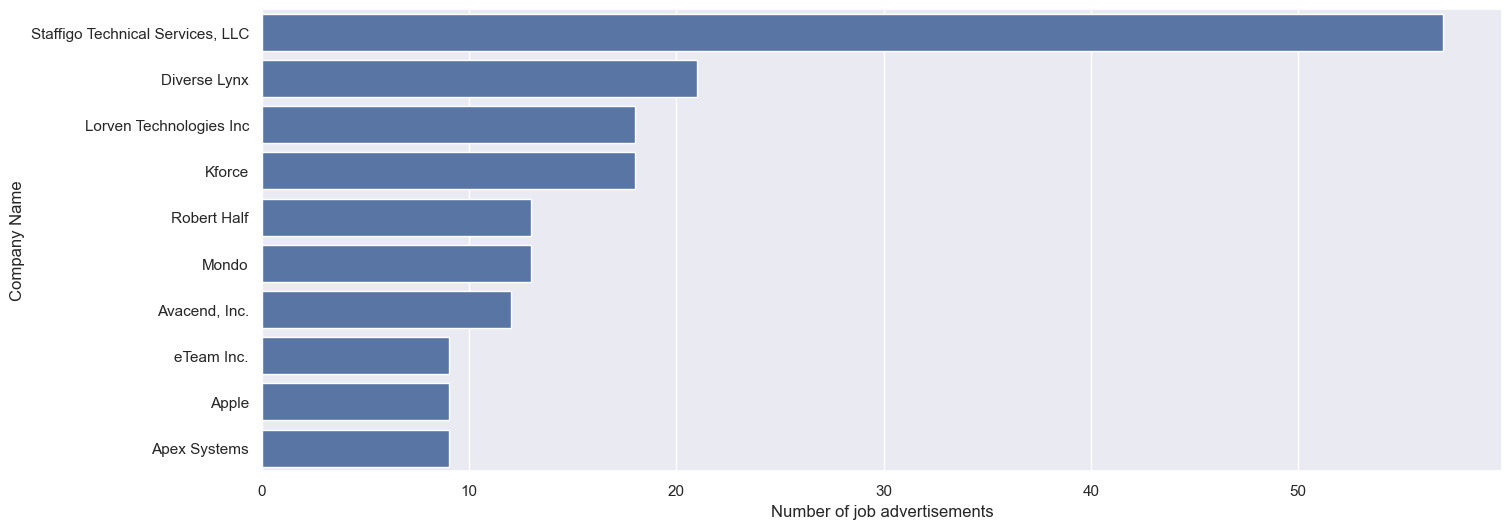

In [53]:
plt.figure(figsize=(16,6))
sns.barplot(x=df_comp_dup['Company_Name_splitted'].value_counts().head(10), y=df_comp_dup['Company_Name_splitted'].value_counts().head(10).index)
plt.xlabel('Number of job advertisements')
plt.ylabel('Company Name')
plt.show()

## Location

In [54]:
df['Location'].str.split(",", expand=True, n=1).iloc[:,1].value_counts()

1
CA              626
TX              394
NY              345
IL              164
PA              114
AZ               97
NC               90
CO               88
NJ               86
WA               53
VA               48
OH               35
UT               33
FL               27
IN               23
DE               11
Arapahoe, CO      8
GA                4
SC                3
KS                3
Name: count, dtype: int64

* Split Location into State and City
* "Arapahoe, CO" makes it necessary to split state by comma

In [55]:
df['State'] = df.loc[:,'Location'].str.split(",").str[-1]

In [56]:
df['City'] = df.loc[:,'Location'].str.split(",").str[0]

### Numer of job advertisements per State

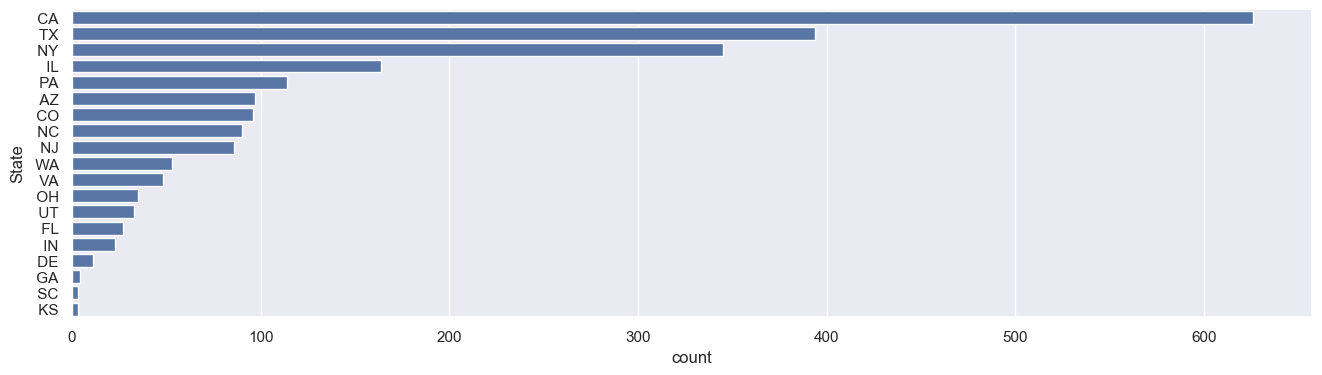

In [57]:
plt.figure(figsize=(16,4))
sns.countplot(df['State'], order= df['State'].value_counts().index)
plt.show()

### Top 10 cities with most job advertisements

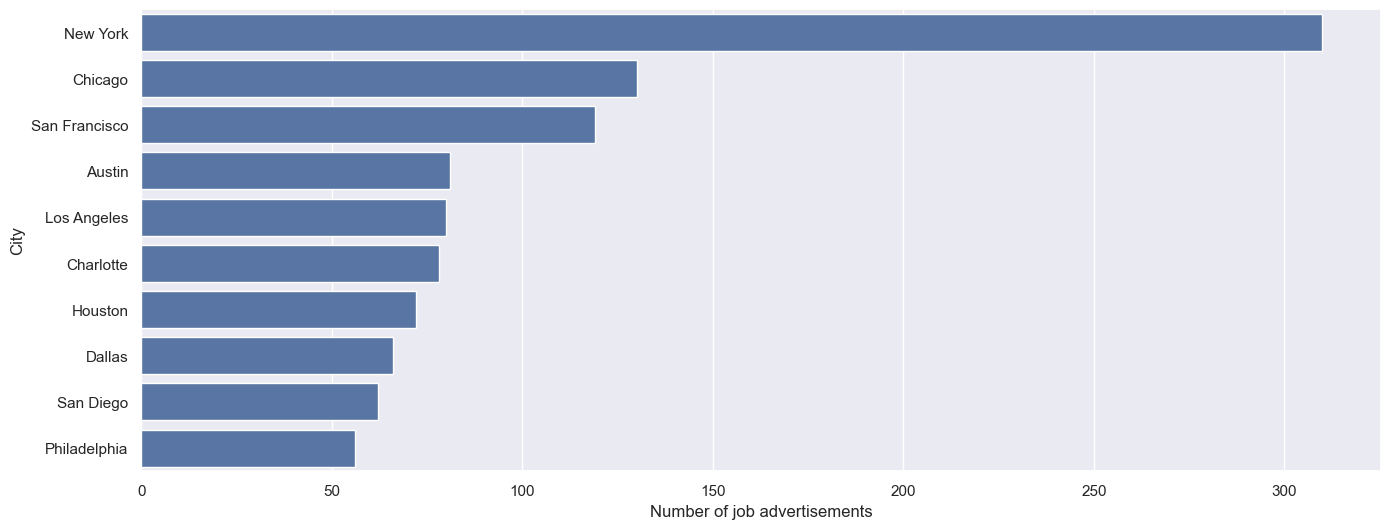

In [58]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['City'].value_counts().head(10), y=df['City'].value_counts().head(10).index)
plt.xlabel('Number of job advertisements')
plt.ylabel('City')
plt.show()

## Company Size

In [59]:
df['Size'].value_counts(dropna=False).sort_index()

Size
-1                         163
1 to 50 employees          347
10000+ employees           375
1001 to 5000 employees     348
201 to 500 employees       249
5001 to 10000 employees     97
501 to 1000 employees      211
51 to 200 employees        420
Unknown                     42
Name: count, dtype: int64

* Unknown size information or -1 will be transformed to Nan
* Will be imputed later

In [60]:
size_missing = (df['Size']=='-1') | (df['Size']=='Unknown')
df.loc[size_missing, 'Size'] = np.nan

In [61]:
df.loc[:,'Size'] = df.loc[:,'Size'].str.replace(' employees', '')

In [62]:
df['Size'].value_counts(dropna=False).sort_index()

Size
1 to 50          347
10000+           375
1001 to 5000     348
201 to 500       249
5001 to 10000     97
501 to 1000      211
51 to 200        420
NaN              205
Name: count, dtype: int64

## Founded

* Replace -1 with NaN

In [63]:
filt_year_missing = (df['Founded'] ==-1)

In [64]:
filt_year_missing.value_counts()

Founded
False    1592
True      660
Name: count, dtype: int64

In [65]:
df.loc[filt_year_missing, 'Founded'] = np.nan

### Quick overview of year outliers

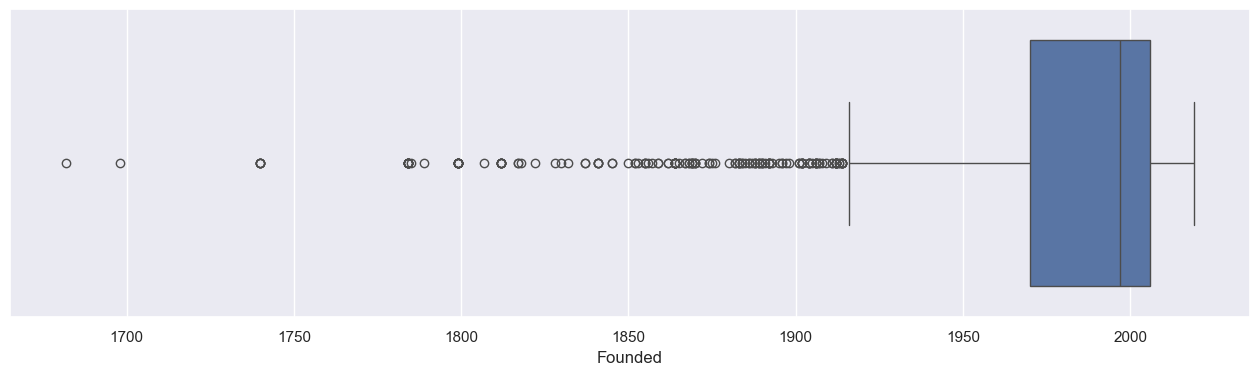

In [66]:
plt.figure(figsize=(16,4))
sns.boxplot(x='Founded', data=df)
plt.show()

* This dataset includes job advertisements from universities
* Universities tend to be founded very early in comparison to most companies

But first let's check outliers that are **below 1900** and does not contain **"University"** in their name:

In [67]:
year_filt_company = (df['Founded'] < 1900) & (df['Company_Name_splitted'].str.lower().str.contains('university')==False)
print(f"Founded below 1900 and not contain term <University> in their name: {len(df.loc[year_filt_company])} entries.")

Founded below 1900 and not contain term <University> in their name: 104 entries.


In [68]:
df.loc[year_filt_company, ['Company_Name_splitted', 'Founded']].head(5)

,Company_Name_splitted,Founded
1,Visiting Nurse Service of New York,1893.0
8,DMGT,1896.0
10,NYU Langone Health,1841.0
12,Montefiore Medical,1884.0
38,NYU Langone Health,1841.0


* Checked a few companies manually, seemed to be correct for the most part

Now let's check outliers **below 1900** that contain term **University**:

In [69]:
year_filt_university = (df['Founded'] < 1900) & (df['Company_Name_splitted'].str.lower().str.contains('university'))
df.loc[year_filt_university].sort_values(by='Company_Name_splitted').head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Salary_Range,Minimum_Salary,Maximum_Salary,AVG_Salary,Analyst_Type,Job_EXP,SAS_extracted,Hadoop_extracted,Python_extracted,R program_extracted,AWS_extracted,Azure_extracted,SQL_extracted,Excel_extracted,Machine Learning_extracted,Tableau_extracted,Power BI_extracted,Qlik_extracted,Competitors_count,Company_Name_splitted,State,City
1000,Data Programmer/Analyst,$46K-$102K (Glassdoor est.),ASU Job Title\nAZ Transfer Sys Anlst\n\n05-Jun...,4.3,Arizona State University\n4.3,"Tempe, AZ","Tempe, AZ",5001 to 10000,1885.0,College / University,Colleges & Universities,Education,$1 to $2 billion (USD),-1,46000-102000,46000.0,102000.0,74000.0,General Data Analyst,intermediate,0,0,0,0,0,0,1,1,0,0,0,0,0,Arizona State University,AZ,Tempe
1175,SR BUSINESS DATA ANALYST PRN,$64K-$113K (Glassdoor est.),Short Description\n\nWork with business leader...,3.3,Cooper University Health Care\n3.3,"Camden, NJ","Camden, NJ",5001 to 10000,1887.0,Hospital,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,-1,64000-113000,64000.0,113000.0,88500.0,Business Data Analyst,senior,0,0,0,0,0,0,0,1,0,0,0,0,0,Cooper University Health Care,NJ,Camden
458,Data Analyst,$43K-$69K (Glassdoor est.),Position:\nData Analyst\n\nDepartment:\nJames ...,2.5,Hampton University\n2.5,"Hampton, VA","Hampton, VA",1001 to 5000,1868.0,College / University,Colleges & Universities,Education,$100 to $500 million (USD),-1,43000-69000,43000.0,69000.0,56000.0,General Data Analyst,intermediate,0,0,0,0,0,0,0,1,0,0,0,0,0,Hampton University,VA,Hampton
2145,Sr. Research Data Analyst,$55K-$101K (Glassdoor est.),*General Summary/Purpose:**\nThe Poverty Inequ...,4.1,Johns Hopkins University\n4.1,"Seattle, WA","Baltimore, MD",10000+,1876.0,College / University,Colleges & Universities,Education,$2 to $5 billion (USD),-1,55000-101000,55000.0,101000.0,78000.0,Research Data Analyst,senior,1,0,0,0,0,0,0,1,0,0,0,0,0,Johns Hopkins University,WA,Seattle
781,Data Analyst - Rush Infectious Diseases,$67K-$92K (Glassdoor est.),Job Detail\nJob Title:\nData Analyst - Rush In...,3.9,Rush University Medical Center\n3.9,"Chicago, IL","Chicago, IL",5001 to 10000,1837.0,Hospital,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,67000-92000,67000.0,92000.0,79500.0,General Data Analyst,intermediate,1,0,0,0,0,0,1,0,0,0,0,0,0,Rush University Medical Center,IL,Chicago


The boxplot above shows entries, **below 1700**:
* Both entries are incorrect
* Will be replaced with NaN and imputed later

In [70]:
filt_year_min = (df['Founded'] < 1700)
df.loc[filt_year_min]

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Salary_Range,Minimum_Salary,Maximum_Salary,AVG_Salary,Analyst_Type,Job_EXP,SAS_extracted,Hadoop_extracted,Python_extracted,R program_extracted,AWS_extracted,Azure_extracted,SQL_extracted,Excel_extracted,Machine Learning_extracted,Tableau_extracted,Power BI_extracted,Qlik_extracted,Competitors_count,Company_Name_splitted,State,City
1845,Data Standardization Analyst(s),$54K-$75K (Glassdoor est.),Role Profile\n\nData Quality & Analytics is pa...,3.2,London Stock Exchange Group\n3.2,"Charlotte, NC","London, United Kingdom",1001 to 5000,1698.0,Company - Public,Stock Exchanges,Finance,$50 to $100 million (USD),"Intercontinental Exchange, Euronext, Nasdaq",54000-75000,54000.0,75000.0,64500.0,General Data Analyst,intermediate,0,0,0,0,0,0,0,1,0,0,0,0,3,London Stock Exchange Group,NC,Charlotte
2023,Data Systems Analyst (7199U,$65K-$120K (Glassdoor est.),and increasing private philanthropy. UDAR prov...,4.1,University of California Berkeley\n4.1,"Berkeley, CA","Berkeley, CA",10000+,1682.0,College / University,Colleges & Universities,Education,$500 million to $1 billion (USD),-1,65000-120000,65000.0,120000.0,92500.0,General Data Analyst,intermediate,0,0,0,0,0,0,0,0,0,1,0,0,0,University of California Berkeley,CA,Berkeley


In [71]:
df.loc[filt_year_min, 'Founded'] = np.nan

* Add also a new feature: **Company Age**

In [72]:
df['Company_age'] = 2020-df['Founded']

## Type of Ownership

In [73]:
df['Type_of_ownership'].value_counts(dropna=False)

Type_of_ownership
Company - Private                 1272
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: count, dtype: int64

* Replace missing type of ownership information with NaN
* Values will be imputed later

In [74]:
type_filt_missing = (df['Type_of_ownership']=='-1') | (df['Type_of_ownership']=='Unknown')

In [75]:
df.loc[type_filt_missing,'Type_of_ownership'] = np.nan

### AVG Salary distribution for Type of Ownership:

In [76]:
sorted_index = df.groupby('Type_of_ownership')['AVG_Salary'].mean().sort_values(ascending=False).index

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\1640206152.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


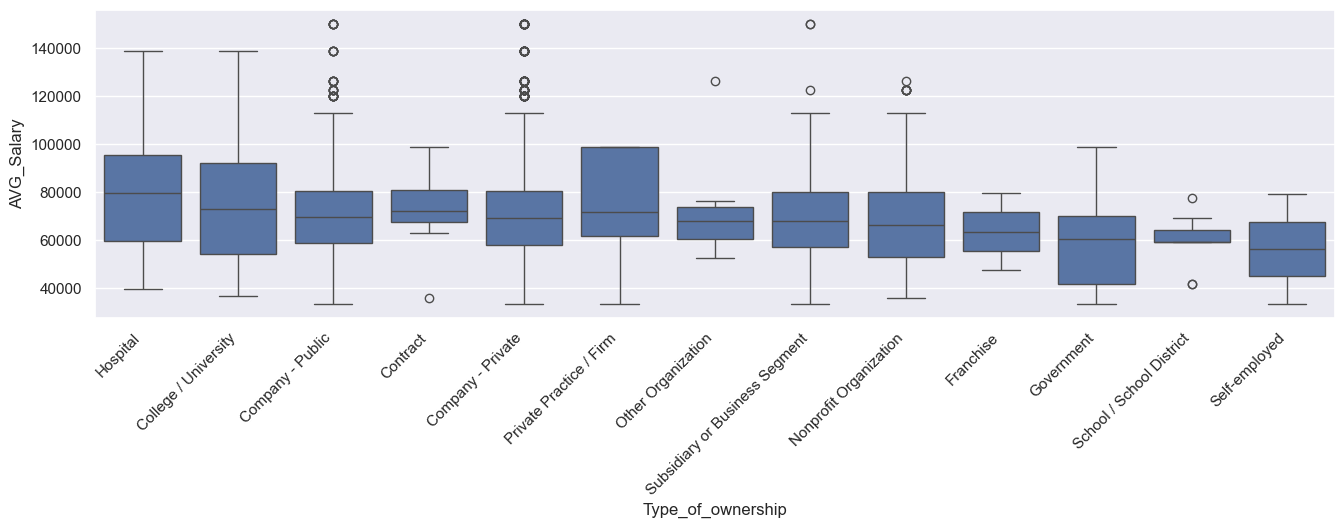

In [77]:
g = plt.figure(figsize=(16,4))
g = sns.boxplot(x='Type_of_ownership', y='AVG_Salary', data=df,  order=sorted_index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [78]:
filt_self_employed = (df['Type_of_ownership']=='Self-employed')
f"Number of entries for Self-employed: {len(df.loc[filt_self_employed])}"

'Number of entries for Self-employed: 2'

* This Boxplot is sorted by the mean avg_salaries by type of ownership
* Hospitals and Universities at the top is something I have not expected
* However schools and government at the bottom is something I did expect
* In the whole dataset "Self-employed" appears only 2 times, so we need to take that into consideration

## Industry

In [79]:
filt_industry_missing = (df['Industry']=='-1')
df.loc[filt_industry_missing, 'Industry'] = np.nan

* A quick look at the **Industry** column shows that there are a lot of different categories

In [80]:
print(f"Number of unique industries: {df['Industry'].nunique()}")

Number of unique industries: 88


* Check the top 10 most occuring industries and sum there percentage

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\1920114872.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right')


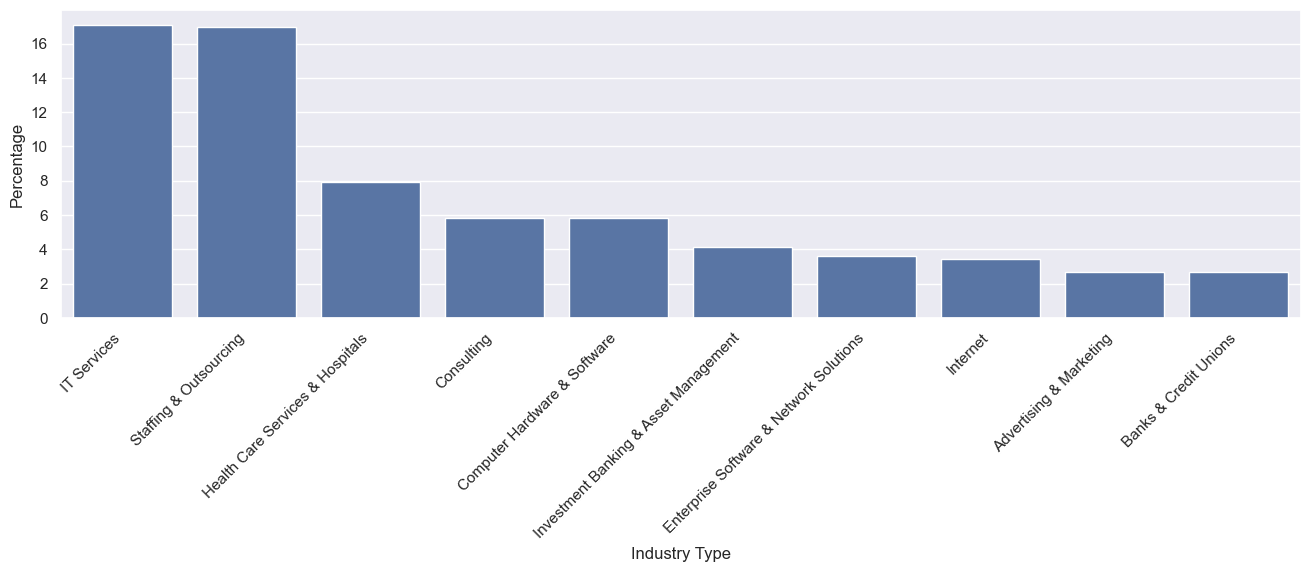

In [81]:
f=plt.figure(figsize=(16,4))
f=sns.barplot(x=df['Industry'].value_counts(normalize=True).iloc[0:10].index, y=df['Industry'].value_counts(normalize=True).iloc[0:10]*100)
plt.xlabel('Industry Type')
plt.ylabel('Percentage')
f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [82]:
percent_top_ten_ind = (df['Industry'].value_counts(normalize=True).iloc[0:10].sum()) * 100
print(f"The 10 most frequently represented industries represent {round(percent_top_ten_ind, 2)}% of all entries.")

The 10 most frequently represented industries represent 70.25% of all entries.


In [83]:
df['Industry'].value_counts().loc[lambda x: x<3]

Industry
Building & Personnel Services               2
Drug & Health Stores                        2
Utilities                                   2
Miscellaneous Manufacturing                 2
Food & Beverage Stores                      2
General Repair & Maintenance                2
Security Services                           2
Beauty & Personal Accessories Stores        2
Convenience Stores & Truck Stops            2
Financial Analytics & Research              2
Chemical Manufacturing                      1
News Outlet                                 1
Express Delivery Services                   1
Truck Rental & Leasing                      1
Sporting Goods Stores                       1
Catering & Food Service Contractors         1
Audiovisual                                 1
Pet & Pet Supplies Stores                   1
Metals Brokers                              1
Consumer Product Rental                     1
Trucking                                    1
Consumer Electronics & Ap

* This dataset seems to contain quite a few of industries that are only represented once or twice

## Sector

In [84]:
filt_sector_missing = (df['Sector']=='-1')
print(f"Missing values for Sector: {len(df.loc[filt_sector_missing])}")

Missing values for Sector: 353


In [85]:
df.loc[filt_sector_missing, 'Sector'] = np.nan

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\3749321296.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')


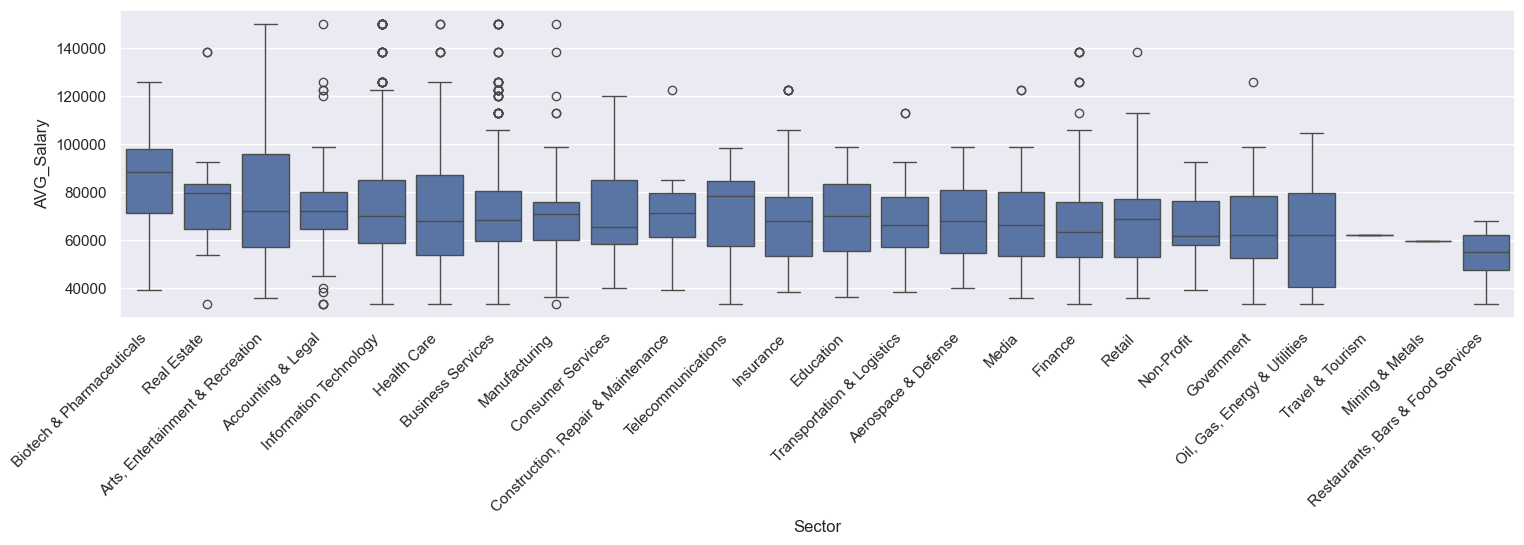

In [86]:
sorted_index=df.groupby('Sector')['AVG_Salary'].mean().sort_values(ascending=False).index
p = plt.figure(figsize=(18,4))
p = sns.boxplot(x='Sector', y='AVG_Salary', data=df, order=sorted_index)
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\1960834736.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right')


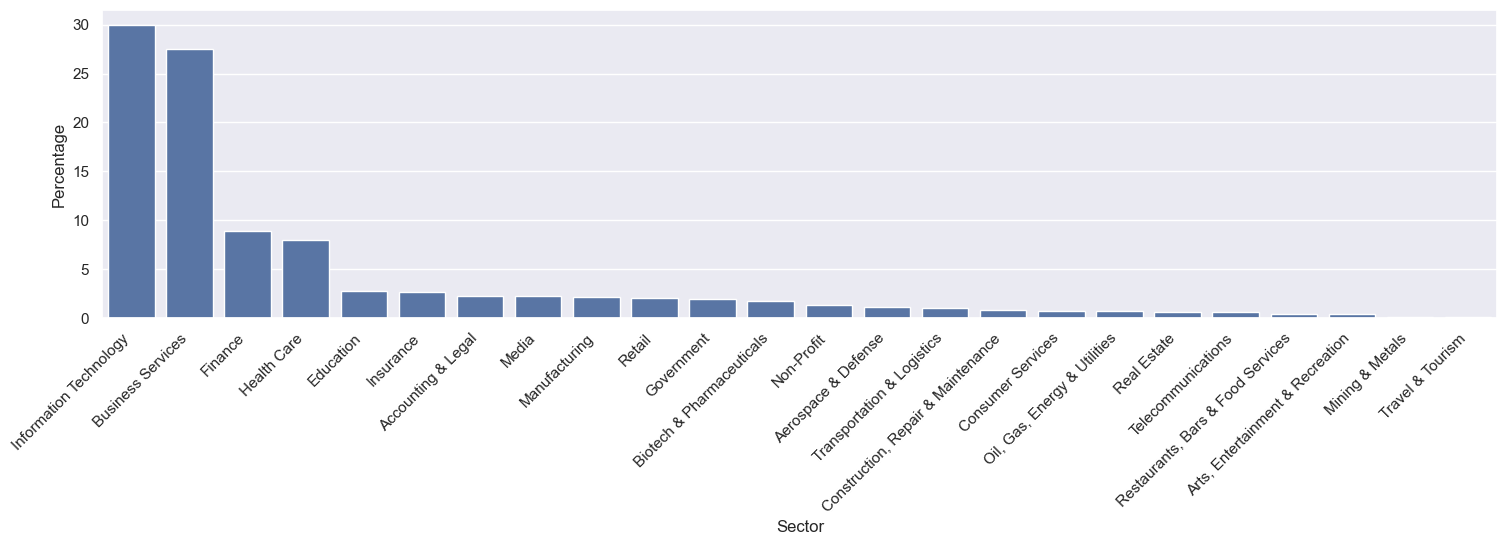

In [87]:
f=plt.figure(figsize=(18,4))
f=sns.barplot(x=df['Sector'].value_counts(normalize=True).index, y=df['Sector'].value_counts(normalize=True)*100)
plt.xlabel('Sector')
plt.ylabel('Percentage')
f.set_xticklabels(f.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Revenue

In [88]:
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            109
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: count, dtype: int64

In [89]:
filt_revenue_missing = (df['Revenue']=='Unknown / Non-Applicable')

In [90]:
df.loc[:,'Revenue'] = df.loc[:,'Revenue'].str.replace(' \(USD\)', '')

In [91]:
df.loc[filt_revenue_missing, 'Revenue'] = np.nan

# Features To be included in the model

In [92]:
df.loc[:,cols_to_melt] = df.loc[:,cols_to_melt].astype(str)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\197489401.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '1' '0' ... '0' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,cols_to_melt] = df.loc[:,cols_to_melt].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\197489401.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' ... '0' '1' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,cols_to_melt] = df.loc[:,cols_to_melt].astype(str)
C:\Users\Admin\AppData\Local\Temp\ipykernel_21372\197489401.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '0' '1' ... '0' '1' '0']' has dtype incompatible with int64, please explicitly cast

In [93]:
included_features = ['Analyst_Type', 'Rating', 'Job_EXP','Size', 'Competitors_count',\
                     'Company_age', 'Type_of_ownership', 'Industry','Sector', 'Revenue', 'State', 'City','AVG_Salary']\
+cols_to_melt

In [94]:
included_features

['Analyst_Type',
 'Rating',
 'Job_EXP',
 'Size',
 'Competitors_count',
 'Company_age',
 'Type_of_ownership',
 'Industry',
 'Sector',
 'Revenue',
 'State',
 'City',
 'AVG_Salary',
 'SAS_extracted',
 'Hadoop_extracted',
 'Python_extracted',
 'R program_extracted',
 'AWS_extracted',
 'Azure_extracted',
 'SQL_extracted',
 'Excel_extracted',
 'Machine Learning_extracted',
 'Tableau_extracted',
 'Power BI_extracted',
 'Qlik_extracted']

In [95]:
df_rel = df.loc[:,included_features]

**Drop Rows where  more than 3 values are Nan:**

In [96]:
len(df_rel.columns)

25

In [97]:
df_rel.dropna(axis=0, thresh=len(df_rel.columns)-3, inplace=True)

In [98]:
initial_len = len(df)
reduced_len = len(df_rel)
print(f'By dropping rows with more than 3 NaN values we lost: {initial_len-reduced_len} rows')

By dropping rows with more than 3 NaN values we lost: 302 rows


* Columns containing NaN values:

In [99]:
df_rel_nan_cols = df_rel.isna().sum()
df_rel_nan_cols[df_rel_nan_cols>0]

Rating                43
Size                   5
Company_age          361
Type_of_ownership      4
Industry              54
Sector                54
Revenue              477
dtype: int64

# Set up

In [100]:
numerical_features = [col_name for col_name in df_rel.columns if df_rel[col_name].dtype in ['int64', 'float64'] and 'Salary' not in col_name]

In [101]:
OHE_features = [col_name for col_name in df_rel.columns if df_rel[col_name].dtype=='object' and df_rel[col_name].nunique() <=10]

In [102]:
HC_features = [col_name for col_name in df_rel.columns if df_rel[col_name].dtype=='object' and df_rel[col_name].nunique() >10]

In [103]:
print(f'Numerical Features: {numerical_features}')
print(f'Low Cardinality Features: {OHE_features}')
print(f'High Cardinality Features: {HC_features}')

Numerical Features: ['Rating', 'Competitors_count', 'Company_age']
Low Cardinality Features: ['Job_EXP', 'Size', 'SAS_extracted', 'Hadoop_extracted', 'Python_extracted', 'R program_extracted', 'AWS_extracted', 'Azure_extracted', 'SQL_extracted', 'Excel_extracted', 'Machine Learning_extracted', 'Tableau_extracted', 'Power BI_extracted', 'Qlik_extracted']
High Cardinality Features: ['Analyst_Type', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'State', 'City', 'AVG_Salary']


In [104]:
X = df_rel.drop('AVG_Salary', axis=1)

In [105]:
y = df_rel['AVG_Salary'].values

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
print(X_train.shape)
print(y_train.shape)

(1560, 24)
(1560,)


In [110]:
!pip install category_encoders


# Modeling

## Define Preprocessing Steps

In [111]:
from sklearn.preprocessing import OneHotEncoder, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import category_encoders as ce

In [112]:
num_transformer = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('normalize', Normalizer())
])

In [113]:
OHE_transformer = Pipeline(steps=[
    ('OHE_impute_cols', SimpleImputer(strategy='constant')),
    ('OHE', OneHotEncoder(handle_unknown='ignore'))
])

In [114]:
HC_transformer = Pipeline(steps=[
    ('HC', ce.CatBoostEncoder())
])

In [115]:
preprocessor= ColumnTransformer(transformers=[
    ('OHE_transform', OHE_transformer, OHE_features),
    ('numerical_transform', num_transformer, numerical_features),
    ('HC_transform', HC_transformer, HC_features)
])

In [116]:
OHE_features

['Job_EXP',
 'Size',
 'SAS_extracted',
 'Hadoop_extracted',
 'Python_extracted',
 'R program_extracted',
 'AWS_extracted',
 'Azure_extracted',
 'SQL_extracted',
 'Excel_extracted',
 'Machine Learning_extracted',
 'Tableau_extracted',
 'Power BI_extracted',
 'Qlik_extracted']

In [117]:
# high cardinality
HC_features

['Analyst_Type',
 'Type_of_ownership',
 'Industry',
 'Sector',
 'Revenue',
 'State',
 'City',
 'AVG_Salary']

In [118]:
numerical_features

['Rating', 'Competitors_count', 'Company_age']

## Define Model

In [119]:
from sklearn.ensemble import RandomForestRegressor
model_regr = RandomForestRegressor(random_state = 42)

## Define Pipeline

In [120]:
pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', model_regr)
])

In [127]:
print(X_train[numerical_cols].dtypes)
print(X_train[numerical_cols].head())


Rating               float64
Job_EXP               object
Competitors_count      int64
Company_age          float64
dtype: object
      Rating       Job_EXP  Competitors_count  Company_age
1018     3.3  intermediate                  0          NaN
624      2.7  intermediate                  0         72.0
1912     3.7  intermediate                  0        114.0
1950     3.7  intermediate                  0          8.0
1093     3.5  intermediate                  2         72.0


## Fit Pipeline

In [129]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# define correct columns
categorical_cols = [
    'Analyst_Type', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue',
    'State', 'City', 'Job_EXP'
]

numerical_cols = [
    'Rating', 'Competitors_count', 'Company_age'
]

skills_cols = [
    'SAS_extracted', 'Hadoop_extracted', 'Python_extracted', 'R program_extracted',
    'AWS_extracted', 'Azure_extracted', 'SQL_extracted', 'Excel_extracted',
    'Machine Learning_extracted', 'Tableau_extracted', 'Power BI_extracted', 'Qlik_extracted'
]

# 🚀 Add an imputer + scaler for numerical
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# one-hot for categorical
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# preprocessor
preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols),
    ('skills', 'passthrough', skills_cols)
])

# pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# fit
pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Analyst_Type',
                                                   'Type_of_ownership',
                                                   'Industry', 'Sector',
                                                   'Revenue', 'State', 'City',
                                                   'Job_EXP']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rating',
                                                   'Competitors_count',
                                                   'Company_age']),
                                                 ('skills', 'passthrough',
                                                  ['SAS_extracted',
                                                   'Hadoop_extracted',
                                                   'Python_extracted',
                                                   'R program_extracted',
                                                   'AWS_extracted',
                                                   'Azure_extracted',
                                                   'SQL_extracted',
                                                   'Excel_extracted',
                                                   'Machine Learning_extracted',
                                                   'Tableau_extracted',
                                                   'Power BI_extracted',
                                                   'Qlik_extracted'])])),
                ('model', RandomForestRegressor(random_state=42))])

## Evaluate Performance

In [130]:
mae_avg_scores = np.mean(-1*cross_val_score(pipe, X, y, cv=10, scoring='neg_mean_absolute_error'))
print(mae_avg_scores)

20197.859001739


## GridSearch

In [131]:
from sklearn.model_selection import GridSearchCV

In [135]:
param_grid = {'model__n_estimators': [100, 150, 200],
 'model__min_samples_split': [4, 5],
 'model__min_samples_leaf':[4, 5],
 'model__max_features': ['sqrt', 'log2', None],  # ✅ fixed here
 'model__max_depth': [4, 5, 6],
 'model__bootstrap': [True]}

In [136]:
gridsearch = GridSearchCV(pipe, param_grid=param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [137]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Analyst_Type',
                                                                          'Type_of_ownership',
                                                                          'Industry',
                                                                          'Sector',
                                                                          'Revenue',
                                                                          'State',
                                                                          'City',
                                                                          'Job_EXP']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Rating',
                                                                          'Competitors_count',
                                                                          'Company...
                                                                          'Learning_extracted',
                                                                          'Tableau_extracted',
                                                                          'Power '
                                                                          'BI_extracted',
                                                                          'Qlik_extracted'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True],
                         'model__max_depth': [4, 5, 6],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [4, 5],
                         'model__min_samples_split': [4, 5],
                         'model__n_estimators': [100, 150, 200]},
             verbose=2)

In [138]:
gridsearch.best_params_

{'model__bootstrap': True,
 'model__max_depth': 6,
 'model__max_features': None,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 4,
 'model__n_estimators': 100}

In [139]:
y_pred_gs = gridsearch.best_estimator_.predict(X_valid)
mae_gs = round(mean_absolute_error(y_valid, y_pred_gs), 2)
print(f'Mean Absolute Error - Gridsearch: \n -> {mae_gs}')

Mean Absolute Error - Gridsearch: 
 -> 14616.42


In [140]:
X_valid.iloc[1:2,:]

,Analyst_Type,Rating,Job_EXP,Size,Competitors_count,Company_age,Type_of_ownership,Industry,Sector,Revenue,State,City,SAS_extracted,Hadoop_extracted,Python_extracted,R program_extracted,AWS_extracted,Azure_extracted,SQL_extracted,Excel_extracted,Machine Learning_extracted,Tableau_extracted,Power BI_extracted,Qlik_extracted
1636,General Data Analyst,2.8,senior,501 to 1000,2,22.0,Company - Private,Internet,Information Technology,NaN,TX,Austin,0,0,0,0,0,0,1,1,0,1,0,0


In [141]:
pipe.predict(X_valid.iloc[1:2,:])

array([71210.])

In [144]:
import pickle

file = open(r'C:\Users\Admin\Downloads\data_analyst_SP.pkl','wb')

pickle.dump(gridsearch.best_estimator_,file)

In [145]:
model = open(r"C:\Users\Admin\Downloads\data_analyst_SP.pkl",'rb')

forest = pickle.load(model)

In [146]:
forest.predict(X_valid.iloc[1:2,:])

array([64971.97179383])

In [147]:
gridsearch.best_estimator_.predict(X_valid.iloc[1:2,:])

array([64971.97179383])

## Notes
* Glasdoor provides rough estimates salaries
* Since the range of salaries is so wide (e.g. 60k - 124k), this also affects the accuracy of the model
* Some of the features contained only a small number of examples
* Creating more specific Analyst Types (Job Titles) and skills from the job description could potentially improve the model